In [11]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

#### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.1 Read the data and do exploratory data analysis. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
print('Number of rows: ', df.shape[0], '\n''Number of columns: ', df.shape[1])

Number of rows:  210 
Number of columns:  7


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


#### Univariate Analysis

#### Spending

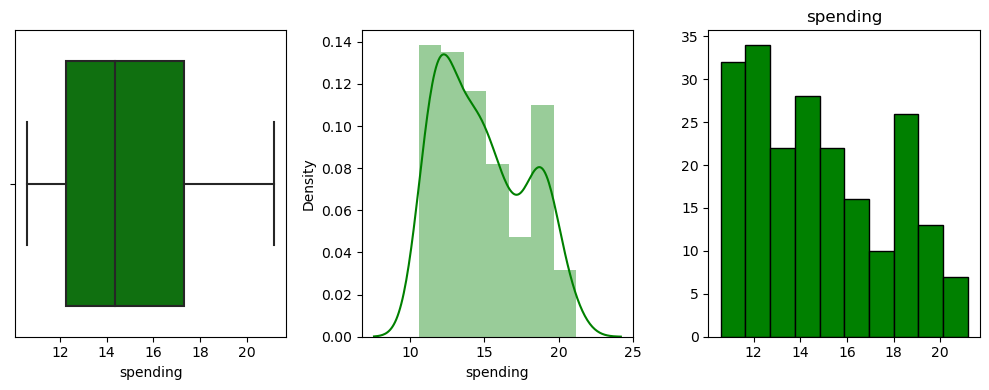

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('spending')
sns.boxplot(df['spending'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['spending'], color='g',ax=axes[1])
df.hist(column='spending', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [13]:
print('Minimum spending: ', df['spending'].min())
print('Maximum spending: ',df['spending'].max())
print('Mean value: ', df['spending'].mean())
print('Median value: ',df['spending'].median())
print('Standard deviation: ', df['spending'].std())

Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361


In [14]:
def detectoutlier(col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw, uw

In [15]:
lr, ur = detectoutlier(df['spending'])
print('Lower outliers in spending: ', lr)
print('Upper outliers in spending: ', ur)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [16]:
print('Number of upper outliers in spending : ', df[df['spending']>24.8575]['spending'].count())
print('Number of lower outliers in spending : ', df[df['spending']<4.7175]['spending'].count())

Number of upper outliers in spending :  0
Number of lower outliers in spending :  0


#### advance_payments

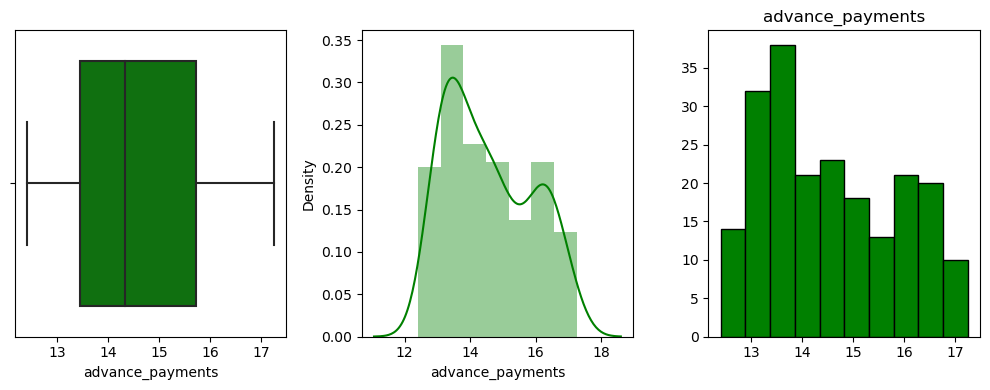

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('advance_payments')
sns.boxplot(df['advance_payments'],orient='horizondal',color='g',ax=axes[0])

sns.distplot(df['advance_payments'], color='g',ax=axes[1])
df.hist(column='advance_payments', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [18]:
print('Minimum advance_payments: ', df['advance_payments'].min())
print('Maximum advance_payments: ',df['advance_payments'].max())
print('Mean value: ', df['advance_payments'].mean())
print('Median value: ',df['advance_payments'].median())
print('Standard deviation: ', df['advance_payments'].std())

Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022


In [19]:
lr, ur = detectoutlier(df['advance_payments'])
print('Lower outliers in advance_payments: ', lr)
print('Upper outliers in advance_payments: ', ur)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [20]:
print('Number of upper outliers in advance_payments : ', df[df['advance_payments']>19.1125]['advance_payments'].count())
print('Number of lower outliers in advance_payments : ', df[df['advance_payments']<10.05249]['advance_payments'].count())

Number of upper outliers in advance_payments :  0
Number of lower outliers in advance_payments :  0


#### probability_of_full_payment

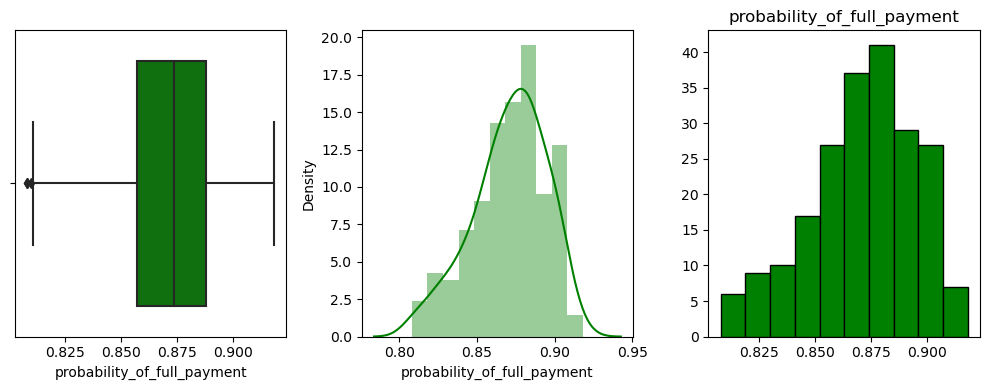

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('probability_of_full_payment')
sns.boxplot(df['probability_of_full_payment'],orient='horizondal',color='g',ax=axes[0])

sns.distplot(df['probability_of_full_payment'], color='g',ax=axes[1])
df.hist(column='probability_of_full_payment', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [22]:
print('Minimum probability_of_full_payment: ', df['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',df['probability_of_full_payment'].max())
print('Mean value: ', df['probability_of_full_payment'].mean())
print('Median value: ',df['probability_of_full_payment'].median())
print('Standard deviation: ', df['probability_of_full_payment'].std())

Minimum probability_of_full_payment:  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465


In [23]:
lr, ur = detectoutlier(df['probability_of_full_payment'])
print('Lower outliers in probability_of_full_payment: ', lr)
print('Upper outliers in probability_of_full_payment: ', ur)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [24]:
print('Number of upper outliers in probability_of_full_payment : ', df[df['probability_of_full_payment']> 0.9340875]['probability_of_full_payment'].count())
print('Number of lower outliers in probability_of_full_payment : ', df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count())

Number of upper outliers in probability_of_full_payment :  0
Number of lower outliers in probability_of_full_payment :  3


#### current_balance

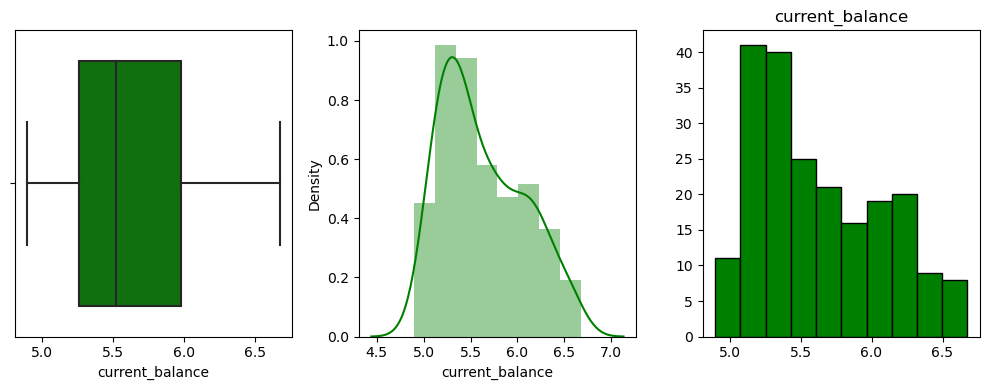

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('current_balance')
sns.boxplot(df['current_balance'],orient='horizondal',color='g',ax=axes[0])

sns.distplot(df['current_balance'], color='g',ax=axes[1])
df.hist(column='current_balance', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [26]:
print('Minimum current_balance: ', df['current_balance'].min())
print('Maximum current_balance: ',df['current_balance'].max())
print('Mean value: ', df['current_balance'].mean())
print('Median value: ',df['current_balance'].median())
print('Standard deviation: ', df['current_balance'].std())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944


In [27]:
lr, ur = detectoutlier(df['current_balance'])
print('Lower outliers in current_balance: ', lr)
print('Upper outliers in current_balance: ', ur)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [28]:
print('Number of upper outliers in current_balance : ', df[df['current_balance']>7.056]['current_balance'].count())
print('Number of lower outliers in current_balance : ', df[df['current_balance']<4.186]['current_balance'].count())

Number of upper outliers in current_balance :  0
Number of lower outliers in current_balance :  0


#### credit_limit

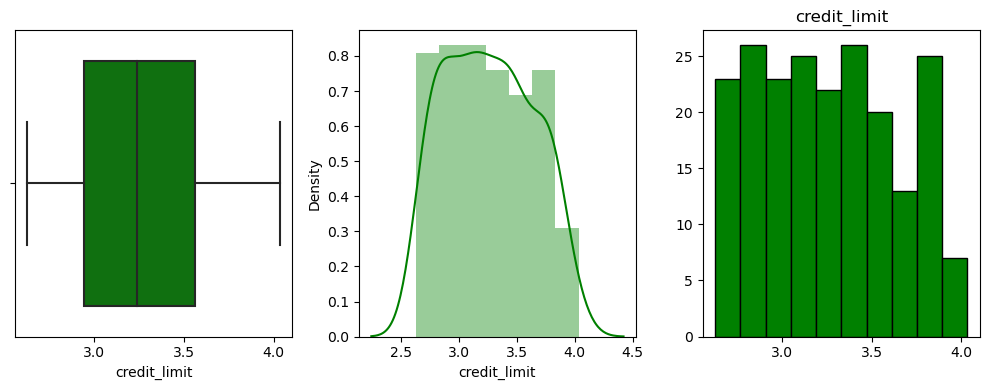

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('credit_limit')
sns.boxplot(df['credit_limit'],orient='horizondal',color='g',ax=axes[0])

sns.distplot(df['credit_limit'], color='g',ax=axes[1])
df.hist(column='credit_limit', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [30]:
print('Minimum credit_limit: ', df['credit_limit'].min())
print('Maximum credit_limit: ',df['credit_limit'].max())
print('Mean value: ', df['credit_limit'].mean())
print('Median value: ',df['credit_limit'].median())
print('Standard deviation: ', df['credit_limit'].std())

Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734


In [31]:
lr, ur = detectoutlier(df['credit_limit'])
print('Lower outliers in credit_limit: ', lr)
print('Upper outliers in credit_limit: ', ur)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [32]:
print('Number of upper outliers in credit_limit : ', df[df['credit_limit']>4.488375]['credit_limit'].count())
print('Number of lower outliers in credit_limit : ', df[df['credit_limit']<2.017375]['credit_limit'].count())

Number of upper outliers in credit_limit :  0
Number of lower outliers in credit_limit :  0


#### min_payment_amt

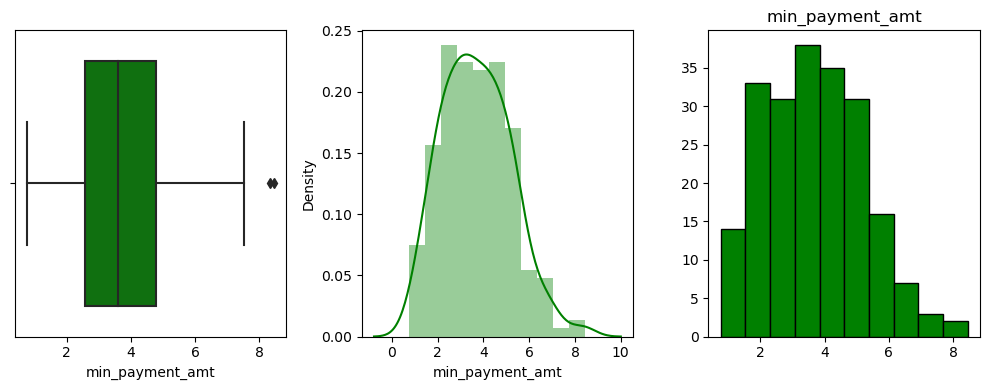

In [33]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('min_payment_amt')
sns.boxplot(df['min_payment_amt'],orient='horizondal',color='g',ax=axes[0])

sns.distplot(df['min_payment_amt'], color='g',ax=axes[1])
df.hist(column='min_payment_amt', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [34]:
print('Minimum min_payment_amt: ', df['min_payment_amt'].min())
print('Maximum min_payment_amt: ',df['min_payment_amt'].max())
print('Mean value: ', df['min_payment_amt'].mean())
print('Median value: ',df['min_payment_amt'].median())
print('Standard deviation: ', df['min_payment_amt'].std())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792


In [35]:
lr, ur = detectoutlier(df['min_payment_amt'])
print('Lower outliers in min_payment_amt: ', lr)
print('Upper outliers in min_payment_amt: ', ur)

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [36]:
print('Number of upper outliers in min_payment_amt : ', df[df['min_payment_amt']> 8.079625]['min_payment_amt'].count())
print('Number of lower outliers in min_payment_amt : ', df[df['min_payment_amt']<-0.749]['min_payment_amt'].count())

Number of upper outliers in min_payment_amt :  2
Number of lower outliers in min_payment_amt :  0


#### max_spent_in_single_shopping

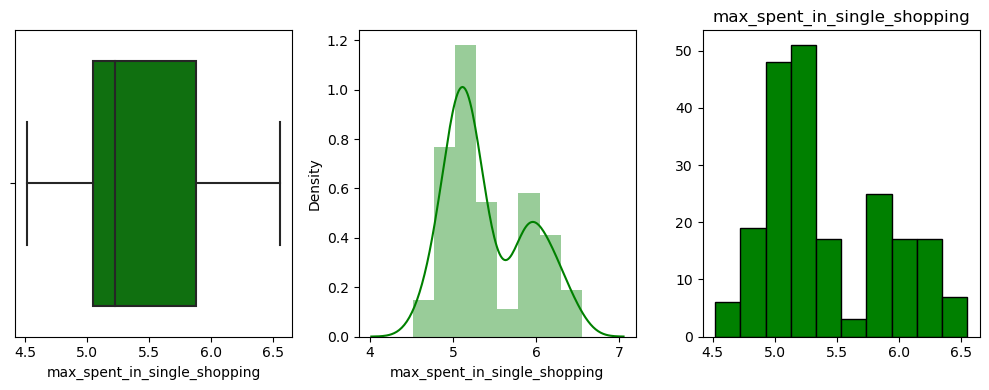

In [37]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('max_spent_in_single_shopping')
sns.boxplot(df['max_spent_in_single_shopping'],orient='horizondal',color='g',ax=axes[0])

sns.distplot(df['max_spent_in_single_shopping'], color='g',ax=axes[1])
df.hist(column='max_spent_in_single_shopping', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [38]:
print('Minimum max_spent_in_single_shopping: ', df['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shopping: ',df['max_spent_in_single_shopping'].max())
print('Mean value: ', df['max_spent_in_single_shopping'].mean())
print('Median value: ',df['max_spent_in_single_shopping'].median())
print('Standard deviation: ', df['max_spent_in_single_shopping'].std())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shopping:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543


In [39]:
lr, ur = detectoutlier(df['max_spent_in_single_shopping'])
print('Lower outliers in max_spent_in_single_shopping: ', lr)
print('Upper outliers in max_spent_in_single_shopping: ', ur)

Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


In [40]:
print('Number of upper outliers in max_spent_in_single_shopping : ', df[df['max_spent_in_single_shopping']>7.125]['max_spent_in_single_shopping'].count())
print('Number of lower outliers in max_spent_in_single_shopping : ', df[df['max_spent_in_single_shopping']<3.797]['max_spent_in_single_shopping'].count())

Number of upper outliers in max_spent_in_single_shopping :  0
Number of lower outliers in max_spent_in_single_shopping :  0


In [41]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

#### Bivariate analysis

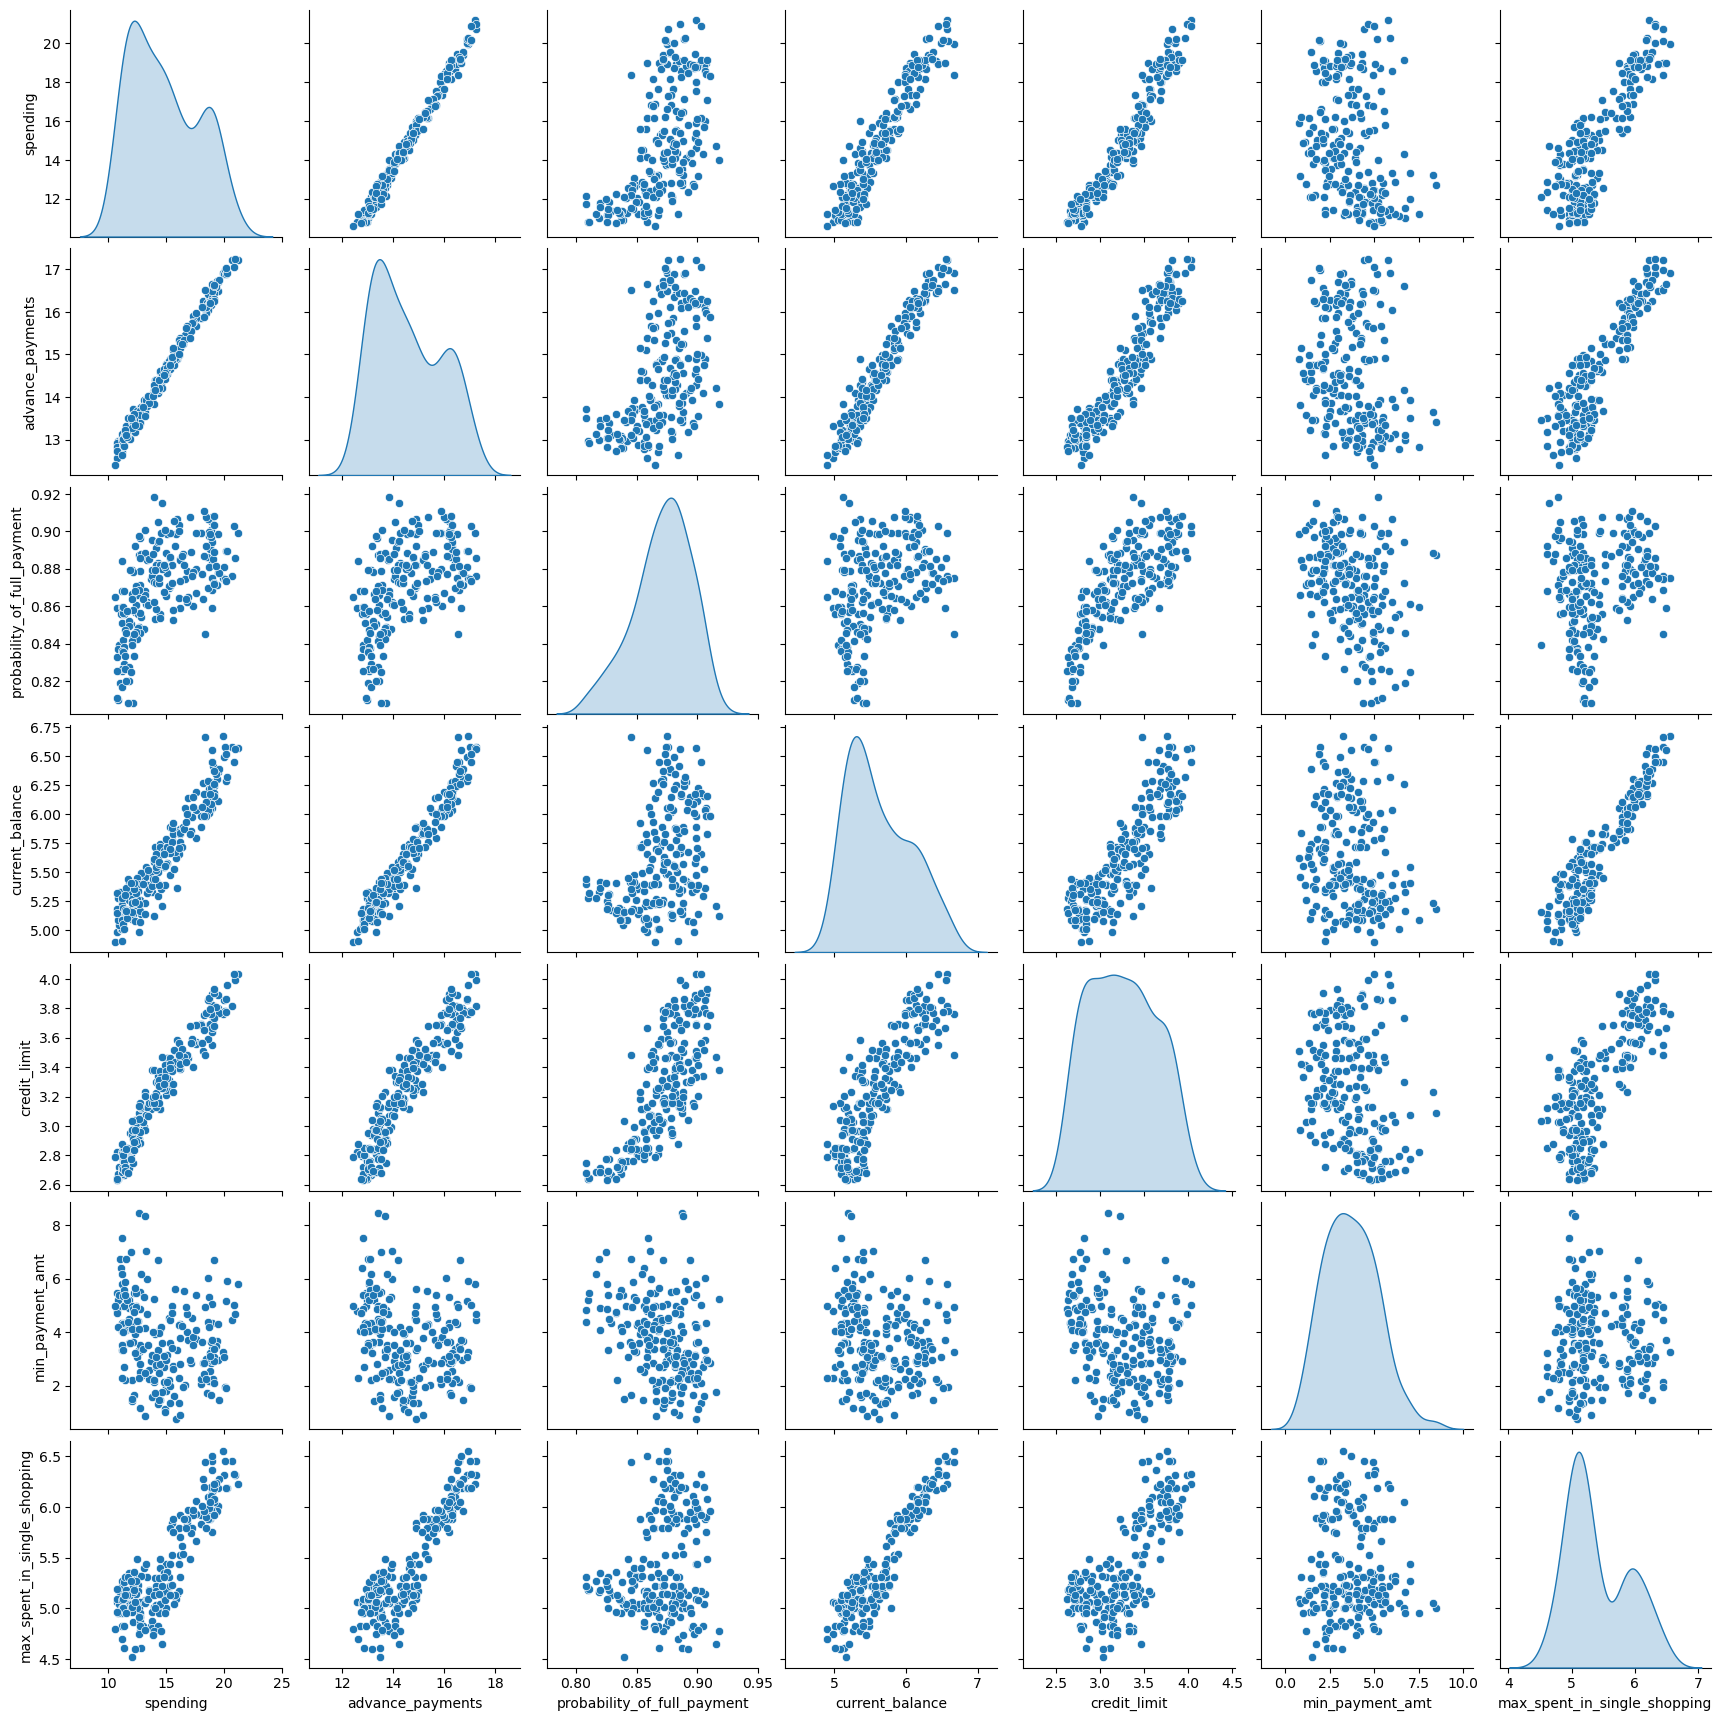

In [42]:
figsize = (8,5)
sns.pairplot(data=df, diag_kind='kde');

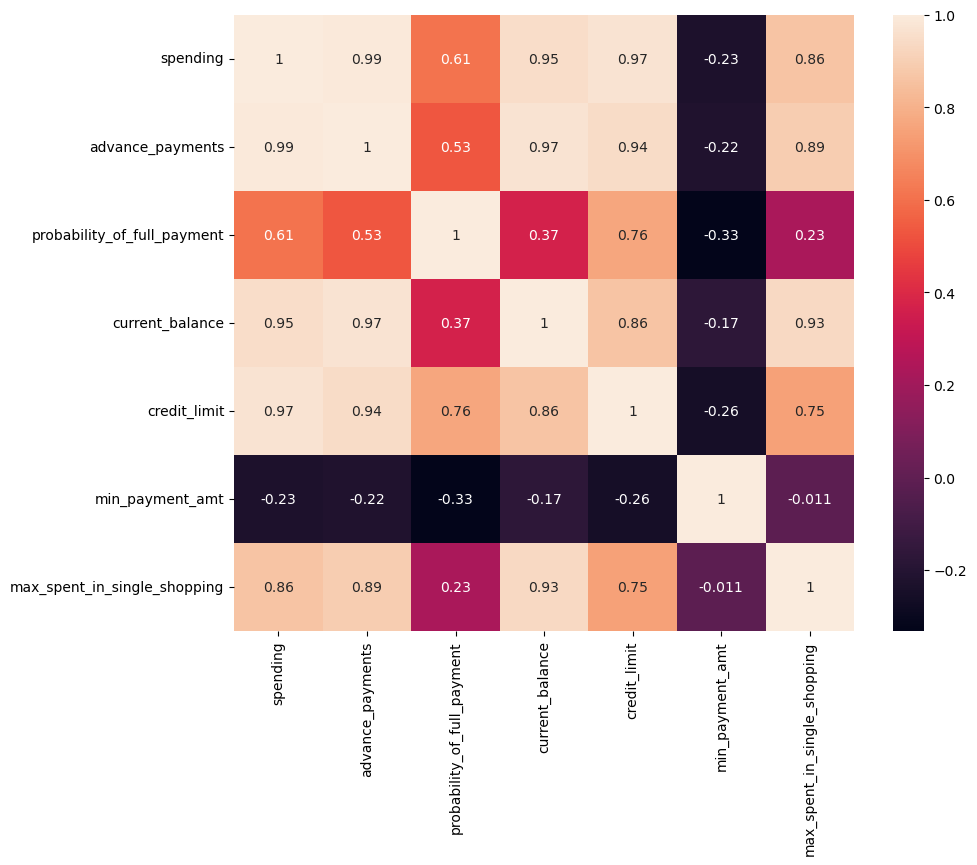

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True);

<AxesSubplot:>

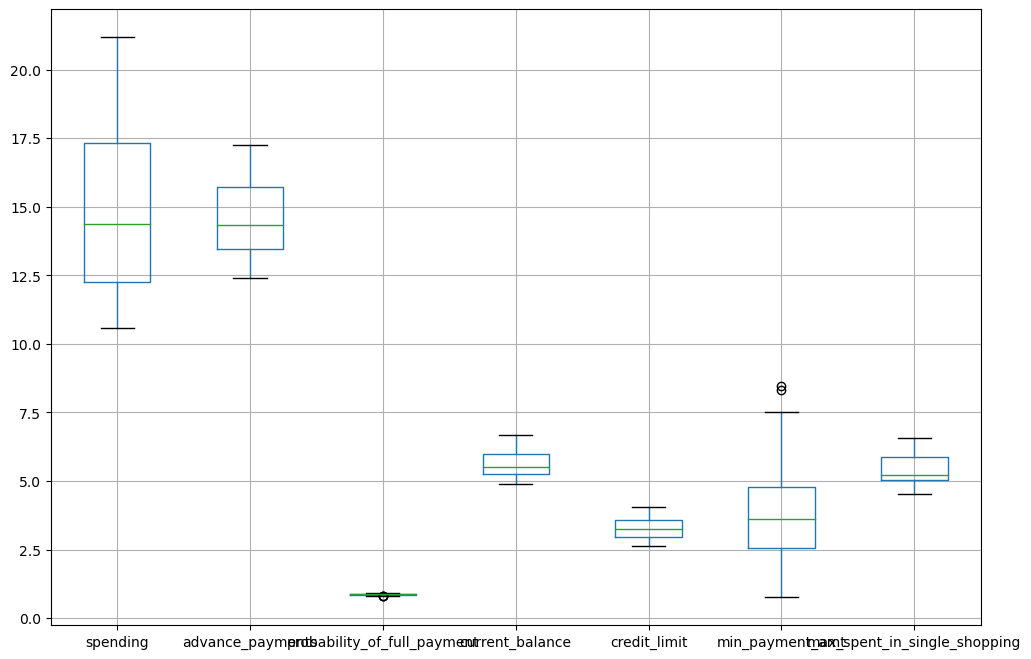

In [44]:
plt.figure(figsize=(12,8))
df.boxplot()

In [45]:
def detectoutlier(col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw, uw

In [46]:
lr, ur = detectoutlier(df['probability_of_full_payment'])
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment']>ur, ur, df['probability_of_full_payment'])

In [47]:
lr, ur = detectoutlier(df['probability_of_full_payment'])
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment']<lr, lr, df['probability_of_full_payment'])

In [48]:
lr, ur = detectoutlier(df['min_payment_amt'])
df['min_payment_amt'] = np.where(df['min_payment_amt']>ur, ur, df['min_payment_amt'])

<AxesSubplot:>

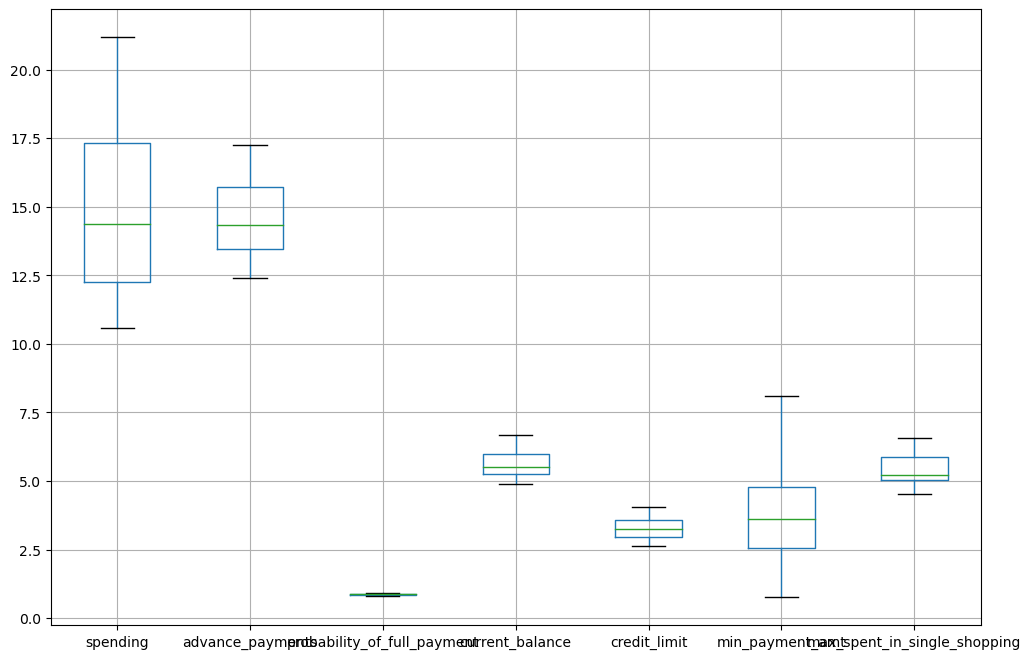

In [49]:
plt.figure(figsize=(12,8))
df.boxplot()

#### 1.2  Do you think scaling is necessary for clustering in this case? Justify

1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

Clustering algorithms such as K-means do need feature scaling before they are fed to the algo. Since, clustering techniques use Euclidean Distance to form the cohorts  it will be wise e.g to scale the variables having heights in meters and weights in KGs before calculating the distance. it controls the variability of the dataset, it convert data into specific range using a linear transformation which generate good quality clusters and improve the accuracy of clustering algorithms.

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
Scaled_df = StandardScaler().fit_transform(df)
Scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [53]:
wardlink = linkage(Scaled_df, method = 'ward')

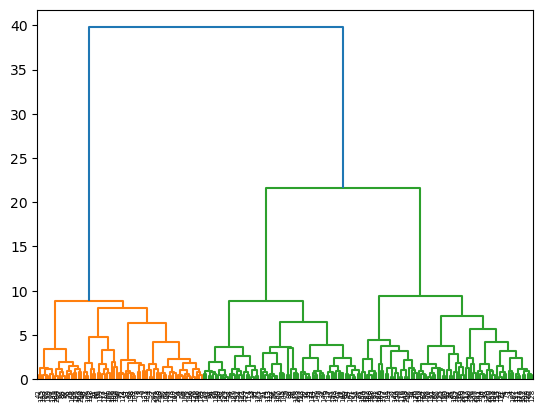

In [54]:
dend = dendrogram(wardlink)

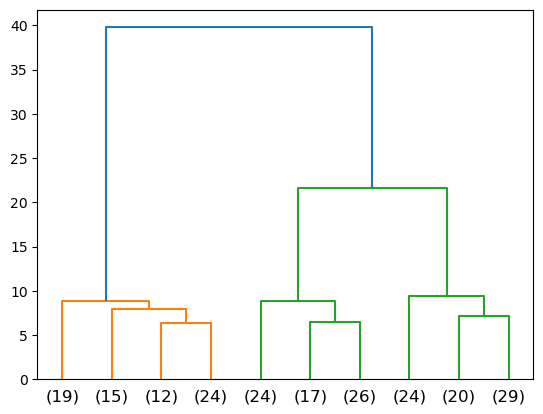

In [55]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [56]:
from scipy.cluster.hierarchy import fcluster

In [57]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [58]:
# Method 2

clusters = fcluster(wardlink, 23, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [59]:
df['clusters'] = clusters

In [60]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [61]:
df['clusters'].value_counts().sort_index()

1     70
2    140
Name: clusters, dtype: int64

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Interpret the inferences from the model. K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Report must contain logical and correct explanations for choosing the optimum clusters using the elbow method. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

In [62]:
k_means = KMeans(n_clusters = 2)
k_means.fit(Scaled_df)
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [63]:
k_means.inertia_

659.1474009548498

In [64]:
k_means = KMeans(n_clusters = 1)
k_means.fit(Scaled_df)
k_means.inertia_

1469.9999999999995

In [65]:
k_means = KMeans(n_clusters = 3)

In [66]:
k_means.fit(Scaled_df)

KMeans(n_clusters=3)

In [67]:
k_means.inertia_

430.29848175122294

In [68]:
k_means.labels_

array([2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1,
       1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1])

In [69]:
k_means = KMeans(n_clusters = 4)
k_means.fit(Scaled_df)
k_means.inertia_

370.9559236534508

In [70]:
k_means = KMeans(n_clusters = 5)
k_means.fit(Scaled_df)
k_means.inertia_

326.71808115771694

In [71]:
wss=[]

In [72]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(Scaled_df)
    wss.append(KM.inertia_)

In [73]:
wss

[1469.9999999999995,
 659.1474009548498,
 430.29848175122294,
 370.69092922102016,
 326.69390858041857,
 289.63788913554157,
 261.7074854939445,
 240.31259991102888,
 222.96813360553986,
 206.1755749653518]

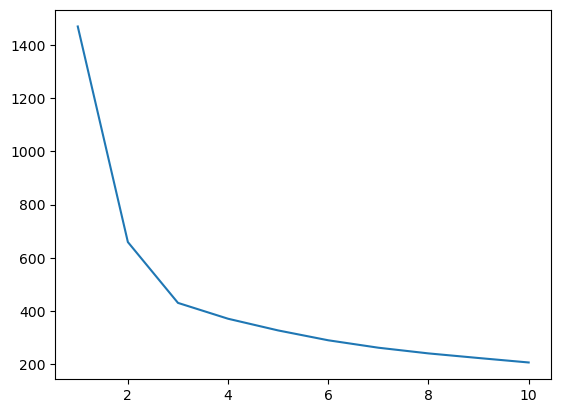

In [74]:
plt.plot(range(1,11), wss);

In [75]:
k_means = KMeans(n_clusters = 3)
k_means.fit(Scaled_df)
labels = k_means.labels_

In [76]:
df['clus_kmeans'] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


#### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters in context to the business problem in-hand. After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.

In [77]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('clusters').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clus_kmeans
clusters,,,,,,,,
1,18.4,16.1,0.9,6.2,3.7,3.6,6.0,0.9
2,13.1,13.8,0.9,5.4,3.0,3.7,5.1,1.0


In [78]:
kmeans_mean_cluster.T

clusters,1,2
spending,18.4,13.1
advance_payments,16.1,13.8
probability_of_full_payment,0.9,0.9
current_balance,6.2,5.4
credit_limit,3.7,3.0
min_payment_amt,3.6,3.7
max_spent_in_single_shopping,6.0,5.1
clus_kmeans,0.9,1.0
